# **ML Project - Bank Marketing Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
color = sns.color_palette()

In [ ]:
df = pd.read_csv('/content/bank-marketing.csv')

In [ ]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [ ]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [ ]:
categorical_columns = [column for column in df.columns[:-1] if df[column].dtype == "O"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
for column in categorical_columns:
    print("Unique values in",column,"are", df[column].unique() )

Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital are ['married' 'single' 'divorced']
Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in targeted are ['yes' 'no']
Unique values in default are ['no' 'yes']
Unique values in housing are ['yes' 'no']
Unique values in loan are ['no' 'yes']
Unique values in contact are ['unknown' 'cellular' 'telephone']
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome are ['unknown' 'failure' 'other' 'success']


In [ ]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **- Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?**

In [ ]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
print("Mean of the pdays column is", df['pdays'].mean())
print("Median of the pdays column is", df['pdays'].median())
print("Min of the pdays column is", df['pdays'].min())

Mean of the pdays column is 40.19782796222158
Median of the pdays column is -1.0
Min of the pdays column is -1


### "pdays" column signifies No. of days passed after the client was contacted from previous campaign. If value is -1 i.e. It is an outlier because no. of days passed can't be negative.

## **-Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?**

In [ ]:
print("Mean of pdays column after eliminating -1 values is", df[df['pdays'] != -1]['pdays'].mean())
print("Median of pdays column after eliminating -1 values is", df[df['pdays'] != -1]['pdays'].median())

Mean of pdays column after eliminating -1 values is 224.57769165556496
Median of pdays column after eliminating -1 values is 194.0


**#After skipping the outlier -1 mean and median values are changed to a much extent.**

## **- Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?**

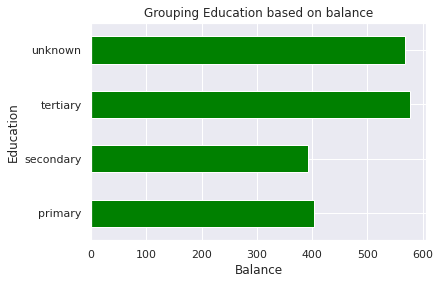

In [ ]:
df.groupby('education')['balance'].median().plot.barh(color='green')
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance');

**Tertiary education level has the highest median.**

## **- Make a box plot for pdays. Do you see any outliers?**

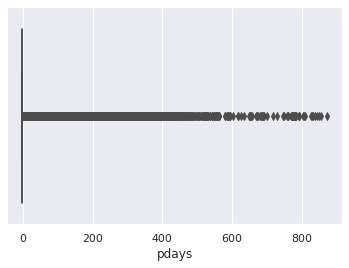

In [ ]:
sns.boxplot(df.pdays);

**Yes, there are lot of outliers in pdays column.**

In [ ]:

df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:

df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

**There are no null values.**

# **The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”**

In [ ]:
df.response.replace({'no'[0],'yes'[1]} ,inplace = True)


In [ ]:
df.response.sample(10)

20338    no
16447    no
30133    no
30032    no
405      no
39128    no
11900    no
28073    no
35071    no
28869    no
Name: response, dtype: object

**We have successfully handled the Target variable i.e Response columns.**

# **First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.**
## **- Convert the response variable to a convenient form**


In [ ]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


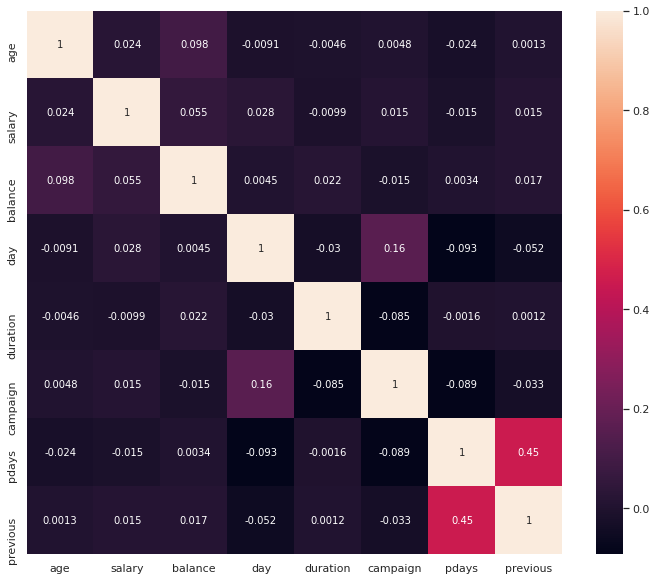

In [ ]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

## **- Make suitable plots for associations with numerical features and categorical features**

## **Associations of categorical variables**

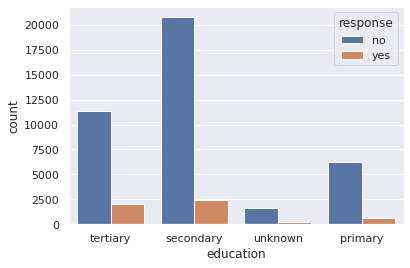

In [ ]:
sns.countplot(df['education'],hue=df['response']);

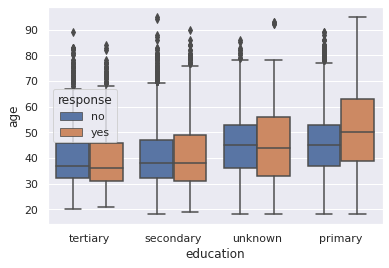

In [ ]:
sns.boxplot(df['education'],df['age'],hue=df['response']);

## **Associations of categorical variables**

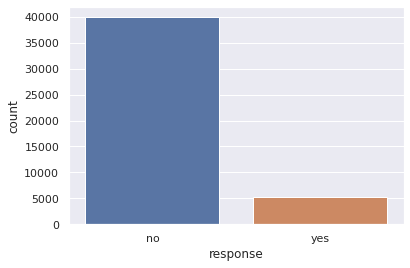

In [ ]:
sns.countplot(x='response', data=df);

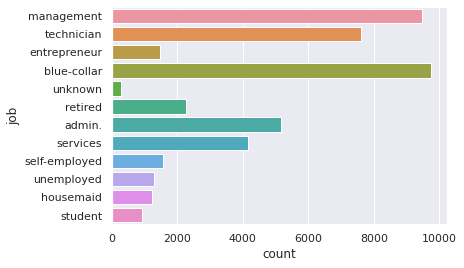

In [ ]:
sns.countplot(y='job', data=df);

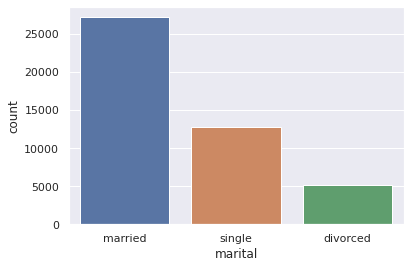

In [ ]:
sns.countplot(x='marital', data=df);

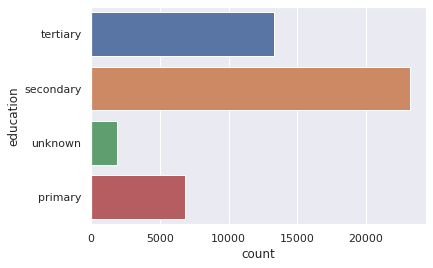

In [ ]:
sns.countplot(y='education', data=df)

## **Are the features about the previous campaign data useful?**

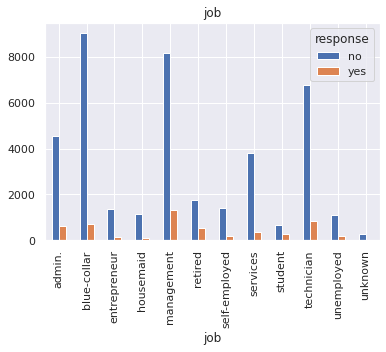

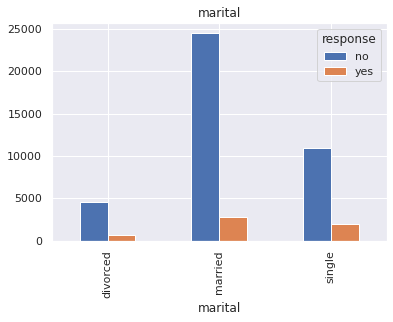

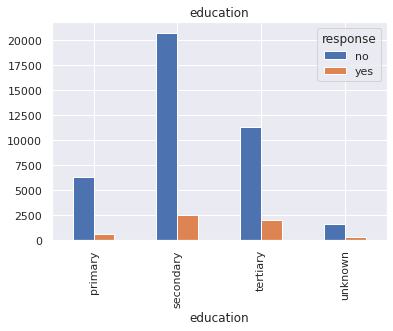

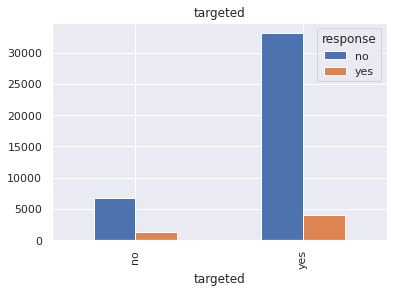

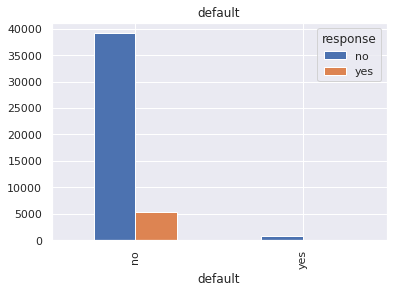

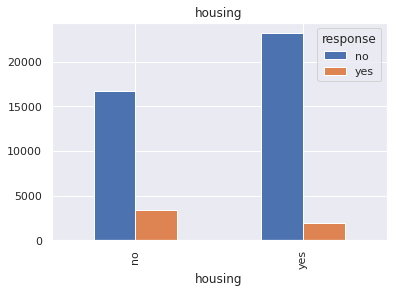

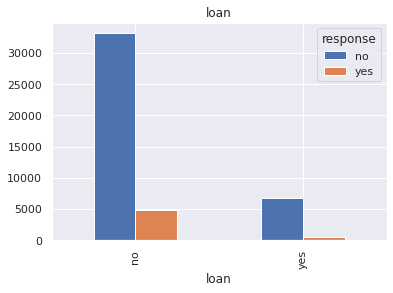

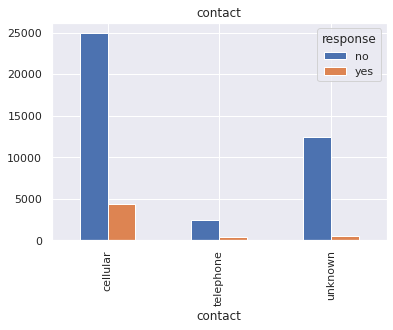

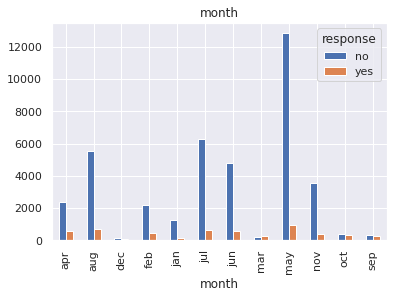

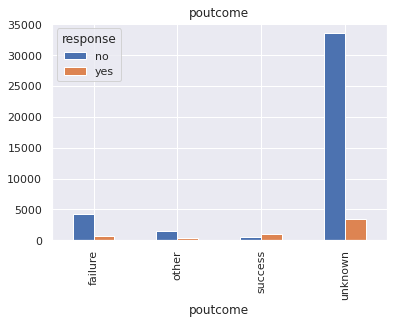

In [ ]:
for column in categorical_columns:
    pd.crosstab(df[column],df['response']).plot.bar()
    plt.title(column)

**poutcome' column is not assosciated with target column because it has more than 80% missing values.**

## **Are pdays and poutcome associated with the target?**

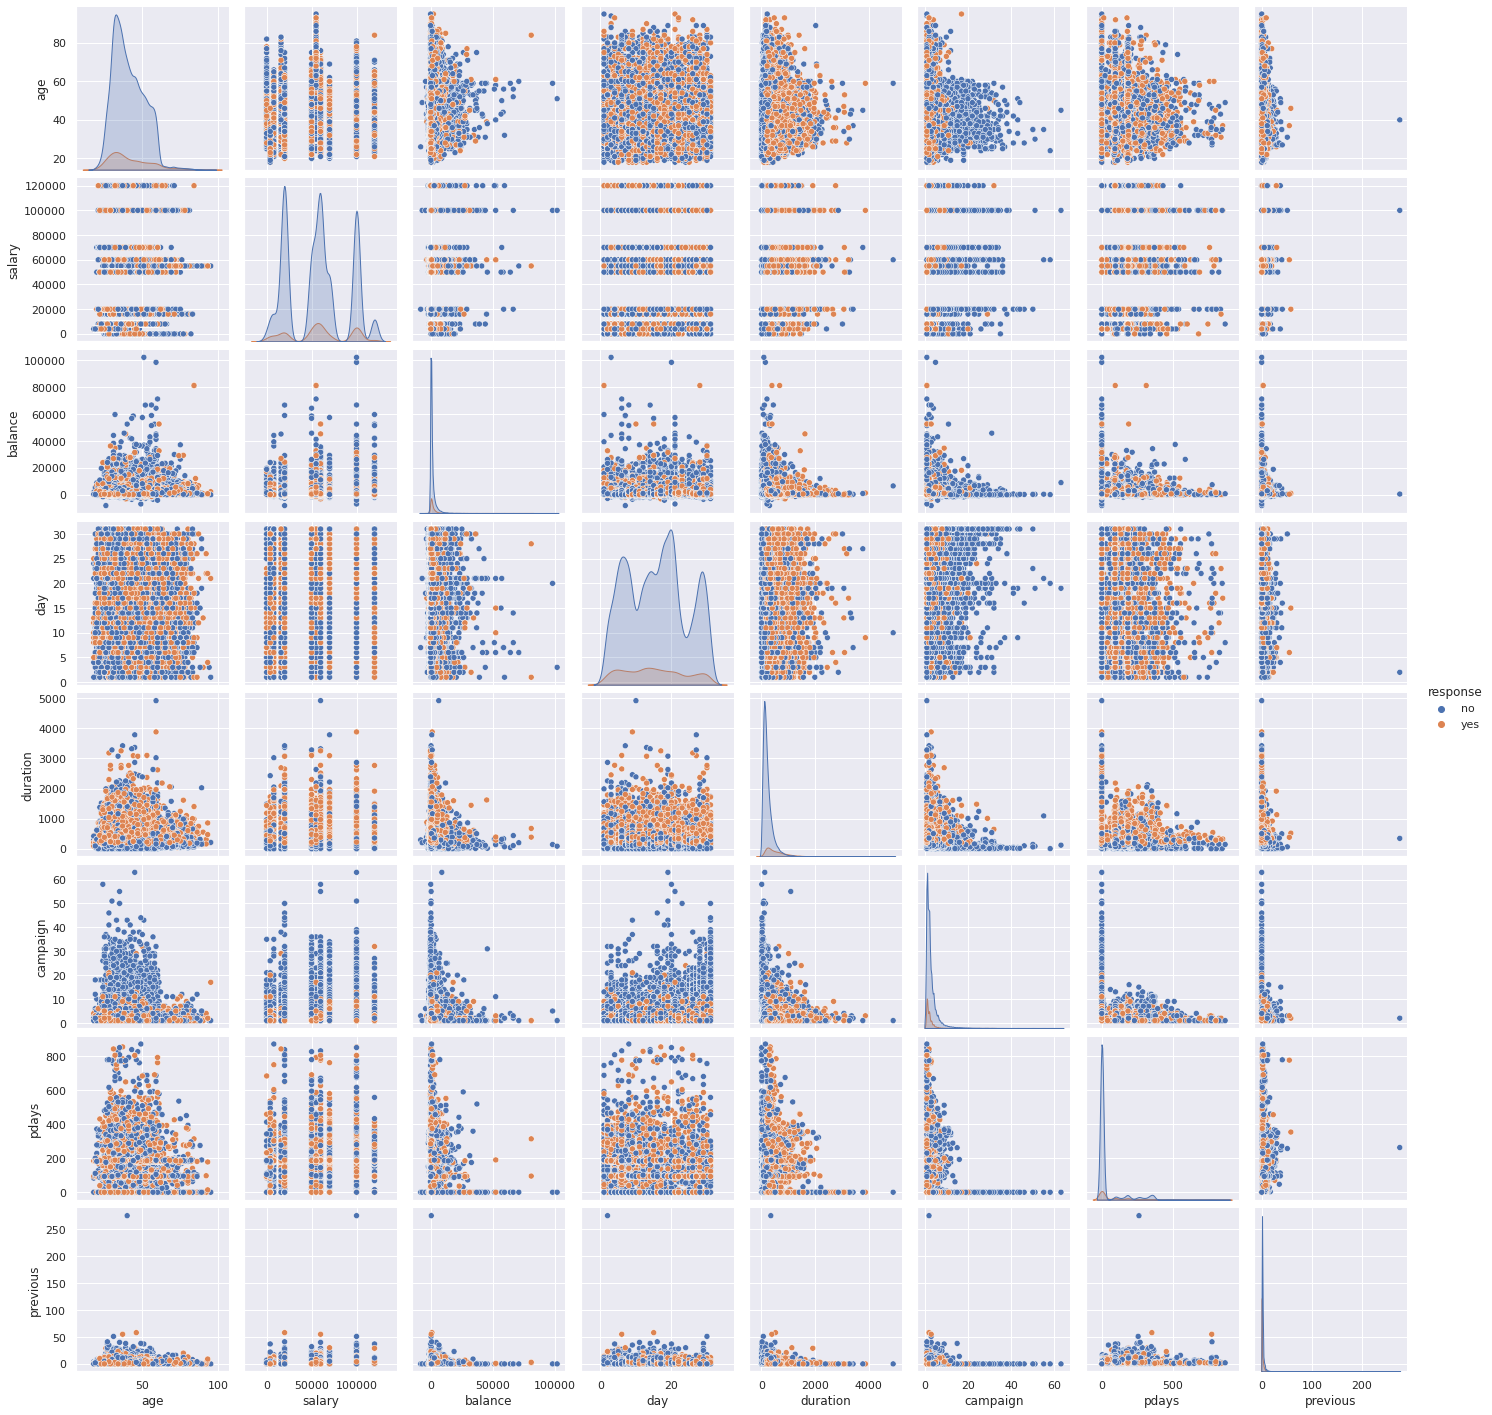

In [ ]:
sns.pairplot(df,hue='response');

In [ ]:
df.drop('poutcome',axis=1,inplace=True)

In [ ]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [ ]:
df['previous'].value_counts().head()

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

## **– how do you handle the pdays column with a value of -1 where the  previous campaign data is missing? Explain your approach and your decision.**


In [ ]:
df['pdays_no_contact'] = np.where(df['pdays']==-1,1,0)
df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64


**We created a new column since majority of users were not previously contacted. We are capturing importance of missing values**

## **Handling Missing Values in Categorical columns**

In [ ]:

categorical_columns

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for column in categorical_columns[:-1]:
    print(df[column].value_counts(),"\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

yes    37091
no      8120
Name: targeted, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 



**Missing Values are represented as Unknown which is better way to handle missing data by becoming a new category itself rather than imputing it with the mode of the particular column.**


## **Handling Outliers in the Data.**

In [ ]:
num_columns = [col for col in df.columns if col not in categorical_columns]
print(num_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'pdays_no_contact']


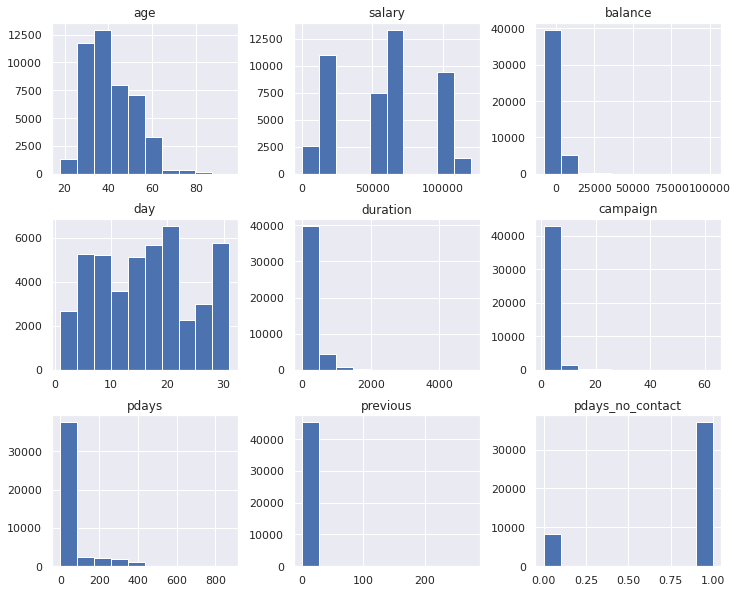

In [ ]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution

In [ ]:
upper_boundary = df['age'].mean() + 3* df['age'].std()
lower_boundary = df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(upper_boundary),print(df['age'].mean())

9.079924091402077
72.79249633725466
40.93621021432837


(None, None, None)

In [ ]:
index = df[(df['age']>upper_boundary) | (df['age']<lower_boundary)].index
df.drop(index=index,axis=0,inplace=True)

In [ ]:
df[(df['age']>upper_boundary) | (df['age']<lower_boundary)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [ ]:
##Assuming Balance follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
##Lets compute the Interquantile range to calculate the boundaries
IQR=df.balance.quantile(0.75)-df.balance.quantile(0.25)

lower_bridge = df['balance'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['balance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1940.5
3423.5


In [ ]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
34,51,management,100000,married,tertiary,yes,no,10635,yes,no,unknown,5,may,336,1,-1,0,no,1
65,51,management,100000,married,tertiary,yes,no,6530,yes,no,unknown,5,may,91,1,-1,0,no,1
69,35,blue-collar,20000,single,secondary,yes,no,12223,yes,yes,unknown,5,may,177,1,-1,0,no,1
70,57,blue-collar,20000,married,secondary,yes,no,5935,yes,yes,unknown,5,may,258,1,-1,0,no,1
186,40,services,70000,divorced,unknown,no,no,4384,yes,no,unknown,5,may,315,1,-1,0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,60,services,70000,married,secondary,yes,no,4428,no,no,cellular,9,nov,125,1,96,6,no,0
45164,35,services,70000,married,tertiary,yes,no,4655,no,no,cellular,9,nov,111,2,-1,0,no,1
45181,46,blue-collar,20000,married,secondary,yes,no,6879,no,no,cellular,15,nov,74,2,118,3,no,0
45185,60,services,70000,married,tertiary,yes,no,4256,yes,no,cellular,16,nov,200,1,92,4,yes,0


In [ ]:
index = df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)].index
df.drop(index=index,axis=0,inplace=True)

In [ ]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [ ]:
df.reset_index(inplace=True)

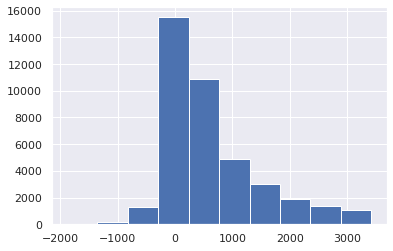

In [ ]:
df['balance'].hist()

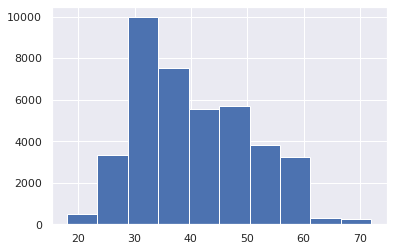

In [ ]:

df['age'].hist()

 **Now Outliers are handled**


# **Handling Categorical columns.**

In [ ]:

df.head()

,index,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,1
1,1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,no,1
2,2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,1
3,3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,1
4,4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,no,1


In [ ]:
df.drop('index',axis=1,inplace=True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,no,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,no,1


In [ ]:

df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
dictionary={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}

df['month']=df['month'].map(dictionary)

In [ ]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [ ]:

df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,no,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,no,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,no,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,no,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,no,1


In [ ]:
df1 = df.copy()
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,no,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,no,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,no,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,no,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,no,1


In [ ]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,response_yes
0,58,100000,2143,5,5,261,1,-1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
1,44,60000,29,5,5,151,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0
2,33,120000,2,5,5,76,1,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0
3,47,20000,1506,5,5,92,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,33,0,1,5,5,198,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:

df1.shape

(40121, 33)

In [ ]:
df1.loc[df1['pdays']==-1,'pdays']=0
df1['pdays'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: pdays, dtype: int64

# **Handling Imbalanced Dataset**

Percentage of subsription :  0.0
Percentage of no subscription :  0.0


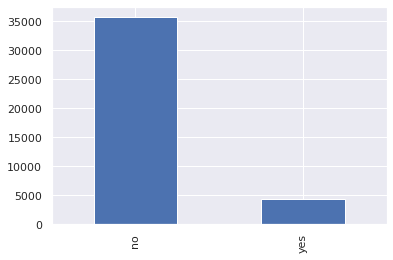

In [ ]:

#Check the percentage of 0 to 1
No_sub = len(df[df['response'] == 0])
Sub = len(df[df['response'] == 1])
percent_No_sub = (No_sub/len(df['response'])) * 100
percent_sub = (Sub/len(df['response'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['response'].value_counts().plot.bar();

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
X = df1.drop('response_yes',axis=1)
y = df1['response_yes']

In [ ]:
from collections import Counter

os=SMOTETomek(1)
X_ns,y_ns = os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))



The number of classes before fit Counter({0: 35737, 1: 4384})
The number of classes after fit Counter({0: 34638, 1: 34638})


In [ ]:
y.value_counts()

0    35737
1     4384
Name: response_yes, dtype: int64

In [ ]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: response_yes, dtype: uint8

In [ ]:
X.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1


In [ ]:

job = 'job_'+df['job'].unique()


In [ ]:

job

array(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], dtype=object)

In [ ]:
X.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)

In [ ]:
'marital_'+df['marital'].unique()

array(['marital_married', 'marital_single', 'marital_divorced'],
      dtype=object)

In [ ]:

X.drop(['marital_married', 'marital_single'],axis=1,inplace=True)

In [ ]:
X.drop(['targeted_yes', 'default_yes'],axis=1,inplace=True)

In [ ]:
X.head()


,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,1,0,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,1,0,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,0,0,1,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,1,0,0,0,1


In [ ]:
X_ns.shape

(69358, 32)

In [ ]:
y_ns.shape

(69358,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
### fit vs fit_transform
scaler.fit_transform(X_ns)

array([[ 1.74930022,  1.32910885,  1.6275798 , ..., -0.33883852,
        -0.19050509,  2.15369529],
       [ 0.38837801,  0.09035893, -0.79560834, ..., -0.33883852,
        -0.19050509,  2.15369529],
       [-0.68091801,  1.94848381, -0.82655729, ...,  2.95125834,
        -0.19050509,  2.15369529],
       ...,
       [-0.58370928, -1.14839099, -0.52853036, ..., -0.33883852,
        -0.19050509, -0.46431824],
       [ 0.38837801,  1.32910885, -0.8288498 , ..., -0.33883852,
        -0.19050509, -0.46431824],
       [ 1.74930022,  0.09035893,  0.11681255, ..., -0.33883852,
        -0.19050509, -0.46431824]])

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.770427,1.356066,1.806949,-1.28712,-0.451685,0.020578,-0.56999,-0.406405,-0.243085,0.465442,-1.053286,1.585412,-0.203737,0.870807,-0.453386,-0.249095,1.546343
1,0.366981,0.108006,-0.722933,-1.28712,-0.451685,-0.410056,-0.56999,-0.406405,-0.243085,0.465442,0.949410,-0.630751,-0.203737,0.870807,-0.453386,-0.249095,1.546343
2,-0.735726,1.980095,-0.755245,-1.28712,-0.451685,-0.703670,-0.56999,-0.406405,-0.243085,0.465442,0.949410,-0.630751,-0.203737,0.870807,2.205626,-0.249095,1.546343
3,0.667720,-1.140053,1.044633,-1.28712,-0.451685,-0.641032,-0.56999,-0.406405,-0.243085,0.465442,-1.053286,-0.630751,4.908290,0.870807,-0.453386,-0.249095,1.546343
4,-0.735726,-1.764082,-0.756442,-1.28712,-0.451685,-0.226058,-0.56999,-0.406405,-0.243085,0.465442,-1.053286,-0.630751,4.908290,-1.148360,-0.453386,-0.249095,1.546343


## **- Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10563   173]
 [ 1019   282]]
0.9009720029907784
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10736
           1       0.62      0.22      0.32      1301

    accuracy                           0.90     12037
   macro avg       0.77      0.60      0.63     12037
weighted avg       0.88      0.90      0.88     12037



## **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_scaled,y,cv=15)

score

array([0.89383178, 0.91813084, 0.92523364, 0.91588785, 0.91514019,
       0.8953271 , 0.90579439, 0.89383178, 0.88672897, 0.87214953,
       0.80934579, 0.87920718, 0.88668661, 0.89715782, 0.8197457 ])

In [ ]:

score.mean()

0.8876132784375678

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[10418   318]
 [  847   454]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10736
           1       0.59      0.35      0.44      1301

    accuracy                           0.90     12037
   macro avg       0.76      0.66      0.69     12037
weighted avg       0.89      0.90      0.89     12037

0.9032150868156518


In [ ]:

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,15)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 80, 151, 222, 292, 363, 434, 504, 575, 646, 717, 787, 858, 929, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
clf_randomcv = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
clf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=504, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf_randomcv.best_score_

0.9081326493018532

In [ ]:
clf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 504,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 50}

In [ ]:
clf_best_random = clf_randomcv.best_estimator_

In [ ]:
y_pred = clf_best_random.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[10441   295]
 [  829   472]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10736
           1       0.62      0.36      0.46      1301

    accuracy                           0.91     12037
   macro avg       0.77      0.67      0.70     12037
weighted avg       0.89      0.91      0.90     12037

0.9066212511423112


## **K-Fold cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_best_random,X_scaled,y,cv=15)

score

array([0.89084112, 0.85383178, 0.82616822, 0.83364486, 0.86093458,
       0.8388785 , 0.8553271 , 0.8082243 , 0.87214953, 0.73719626,
       0.67551402, 0.40987285, 0.84106208, 0.8500374 , 0.47344802])

In [ ]:
score.mean()

0.7751420416285123

Random Forest Performs much better as its average accuracy score is 87.3% to that of Logistic regression which has an accuracy of 85.8%.

I have used Accuracy as a metric to compare because I have handled the imbalanced data, would it be imbalanced I should have used F1-score.c